# Pymaceuticals Inc.
---

### Analysis

Summary:
There were 248 mice tested and 10 different drugs.  There was a fairly even male to female ratio to provide a decent case study.

Some Significant results:
•	The tumor volume is the highest in the Ketapril drug
•	There is a fairly strong Positive correlation
•	Tumor volume went down over time on the drug Capomulin

 

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


# Display the data table for preview
merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [34]:
# Checking the number of mice.
mouse_count = len(merge_df["Mouse ID"].unique())
mouse_count



249

In [35]:
merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

array(['g989'], dtype=object)

In [36]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
group_by_ID = merge_df.groupby(["Mouse ID"])
duplicates = group_by_ID["Timepoint"].value_counts()
duplicates_df = duplicates.to_frame()
dupes_df = duplicates_df.loc[(duplicates_df["Timepoint"]>1)]

In [37]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse = merge_df[merge_df["Mouse ID"] =="g989"]
dupe_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df["Mouse ID"] !="g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [39]:
# Checking the number of mice in the clean DataFrame. One mouse removed
mouse_count = len(clean_df["Mouse ID"].unique())
mouse_count


248

In [40]:
clean_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,12.757979,25.660106,19.606383,50.435293,1.025000
std,7.181998,3.935064,14.094238,8.914197,1.139971
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.933454,1.000000
75%,19.250000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [41]:
group_by_drug = clean_df.groupby(["Drug Regimen"])

group_by_drug.count().head(15)

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


## Summary Statistics

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#Create df with Tumor Volume statistics
drug_stats_df = group_by_drug["Tumor Volume (mm3)"].describe()
#drug_stats_df

# #drop unnecessary columns for new df
tumor_stats_df = drug_stats_df.drop(columns= ["count","min","25%","50%","75%","max"])
#tumor_stats_df

# #calculate additional stats for new df
variance = group_by_drug["Tumor Volume (mm3)"].var()
median = group_by_drug["Tumor Volume (mm3)"].median()
sem = group_by_drug["Tumor Volume (mm3)"].sem()

# #add additional stats columns to df
tumor_stats_df["variance"] = variance
tumor_stats_df["median"] = median
tumor_stats_df["sem"] = sem

# #reorder columns to reflect order in the instructions
tumor_stats_df = tumor_stats_df[["mean","median","variance","std","sem"]]
tumor_stats_df



,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
group_by_drug.agg({'Tumor Volume (mm3)':["median", "mean", "var", "std", "sem"]})


Tumor Volume (mm3)                                          
                         median       mean        var       std       sem
Drug Regimen                                                             
Capomulin             41.557809  40.675741  24.947764  4.994774  0.329346
Ceftamin              51.776157  52.591172  39.290177  6.268188  0.469821
Infubinol             51.820584  52.884795  43.128684  6.567243  0.492236
Ketapril              53.698743  55.235638  68.553577  8.279709  0.603860
Naftisol              52.509285  54.331565  66.173479  8.134708  0.596466
Placebo               52.288934  54.033581  61.168083  7.821003  0.581331
Propriva              50.446266  52.320930  43.852013  6.622085  0.544332
Ramicane              40.673236  40.216745  23.486704  4.846308  0.320955
Stelasyn              52.431737  54.233149  59.450562  7.710419  0.573111
Zoniferol             51.818479  53.236507  48.533355  6.966589  0.516398

## Bar and Pie Charts

([<matplotlib.axis.XTick at 0x20ea68ba4a8>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

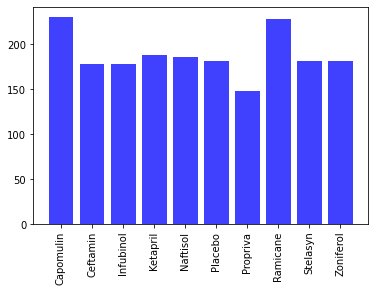

In [44]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#x axis
x_axis = np.arange(len(group_by_drug["Drug Regimen"]))

#y axis
mouse_count = group_by_drug["Mouse ID"].count()
mouse_count_df = mouse_count.to_frame()
y_axis = mouse_count_df["Mouse ID"]

#Plot bar graph
plt.bar(x_axis, y_axis, color='b', alpha=0.75, align="center")

#tick mark management
tick_locations = [value for value in x_axis]
ticks = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol",
         "Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
plt.xticks(tick_locations, ticks,rotation=90)

Text(0.5, 1.0, 'Mice Data per Drug Regimen')

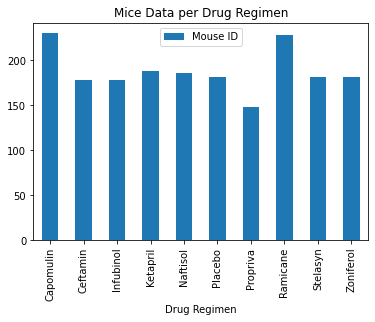

In [45]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mouse_count_df.plot(kind="bar")
plt.title("Mice Data per Drug Regimen")    



(-1.1065502689644005,
 1.1003119175697333,
 -1.1079114197007642,
 1.1041200173094385)

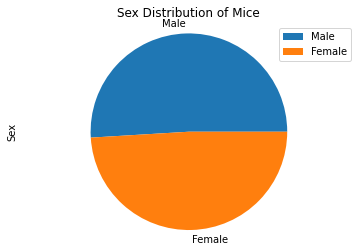

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_df["Sex"].value_counts()
sex_df = sex.to_frame()

sex_pie = sex_df.plot(kind="pie", y='Sex', title=("Sex Distribution of Mice"))

plt.axis("equal")



([<matplotlib.patches.Wedge at 0x20ea670df28>,
 [Text(-0.681404241901343, -0.8635324308437154, 'Male'),
  Text(0.6814042419013431, 0.8635324308437154, 'Female')],
 [Text(-0.3716750410370961, -0.47101768955111745, '51.0%'),
  Text(0.3716750410370962, 0.47101768955111745, '49.0%')])

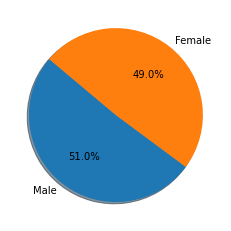

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Male","Female"]
plt.pie(sex, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)


## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Ramicane_df = clean_df.loc[clean_df['Drug Regimen'] == "Ramicane"]
Infubinol_df = clean_df.loc[clean_df['Drug Regimen'] == "Infubinol"]
Ceftamin_df = clean_df.loc[clean_df['Drug Regimen'] == "Ceftamin"]
Capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
frames = [Capomulin_df, Ramicane_df, Infubinol_df, Ceftamin_df]
four_drugs = pd.concat(frames)

# Start by getting the last (greatest) timepoint for each mouse
max_time = group_by_ID["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_frames = pd.merge(four_drugs,max_time, on="Mouse ID")
merged_frames["MaxTime"] = merged_frames["Timepoint_x"] == merged_frames["Timepoint_y"]
merged_frames


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y,MaxTime
0,s185,Capomulin,Female,3,17,0,45.000000,0,45,False
1,s185,Capomulin,Female,3,17,5,43.878496,0,45,False
2,s185,Capomulin,Female,3,17,10,37.614948,0,45,False
3,s185,Capomulin,Female,3,17,15,38.177232,0,45,False
4,s185,Capomulin,Female,3,17,20,36.866876,0,45,False
...,...,...,...,...,...,...,...,...,...,...
809,y865,Ceftamin,Male,23,26,25,57.173538,2,45,False
810,y865,Ceftamin,Male,23,26,30,59.033275,3,45,False
811,y865,Ceftamin,Male,23,26,35,61.153140,3,45,False
812,y865,Ceftamin,Male,23,26,40,63.469549,3,45,False


In [49]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:
    volume = merged_frames.loc[merged_frames["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_volume.append(volume)
    #print(tumor_volume)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartile = volume.quantile([0.25,0.5,0.75])
    lower = quartile[0.25]
    upper = quartile[0.75]
    iqr = upper - lower
    #print(iqr)
    
    # Determine outliers using upper and lower bounds
    low_bound = lower - (1.5*iqr)
    up_bound = upper + (1.5*iqr)
    outliers = volume.loc[(volume > up_bound) | (volume < low_bound)]
    if len(outliers) > 0:
        print(f"The outliers for {drug} are {outliers}.") 
    
    

The outliers for Capomulin are 8    25.472143
9    23.343598
Name: Tumor Volume (mm3), dtype: float64.
The outliers for Ramicane are 239    22.050126
Name: Tumor Volume (mm3), dtype: float64.


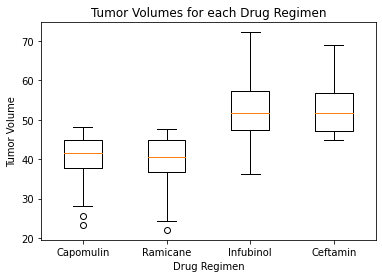

In [50]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume, labels = treatment)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volumes for each Drug Regimen")
plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

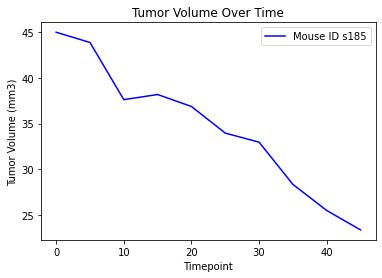

In [51]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Mouse185 = Capomulin_df.loc[Capomulin_df["Mouse ID"]=="s185"]
x = Mouse185["Timepoint"]
y = Mouse185["Tumor Volume (mm3)"]

plt.plot(x, y, color="blue",label="Mouse ID s185")
plt.legend(loc="best")
plt.title("Tumor Volume Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")


Text(0, 0.5, 'Tumor Volume (mm3)')

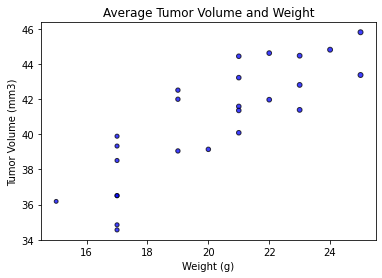

In [52]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

mouse_data = Capomulin_df.groupby("Mouse ID")
mousewg = mouse_data["Weight (g)"].mean()
mousetv = mouse_data["Tumor Volume (mm3)"].mean()

#set x and y values
x_values = mouse_df["Weight (g)"]
y_values = mouse_df["Tumor Volume (mm3)"]

#create scatter plot
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
            s=x_values, alpha=0.75)
plt.title("Average Tumor Volume and Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")


## Correlation and Regression

Text(20, 37, 'y = 0.95x + 21.55')

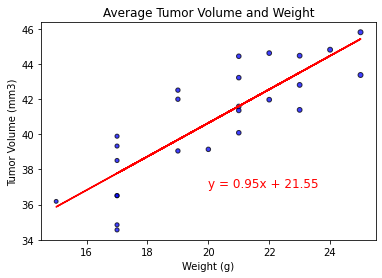

In [54]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_data = Capomulin_df.groupby("Mouse ID")
mousewg = mouse_data["Weight (g)"].mean()
mousetv = mouse_data["Tumor Volume (mm3)"].mean()

#set x and y values
x_values = mouse_df["Weight (g)"]
y_values = mouse_df["Tumor Volume (mm3)"]

#create scatter plot
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
            s=x_values, alpha=0.75)
plt.title("Average Tumor Volume and Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=12,color="red")


